In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

### Load

In [15]:
pwd = os.getcwd()

In [16]:
header = ["raw"]
df = pd.read_csv(os.path.basename(pwd +'/transactions.txt'),header=None, sep='\t', names=header)


In [17]:
df_subset = df.copy()
df_subset = df_subset.replace('"','', regex=True)

In [18]:
df_subset.raw = df_subset.raw.str[1:]
df_subset.raw = df_subset.raw.str[:-1]
df_subset.head()

,raw
0,"accountNumber: 737265056, customerId: 73726505..."
1,"accountNumber: 737265056, customerId: 73726505..."
2,"accountNumber: 737265056, customerId: 73726505..."
3,"accountNumber: 737265056, customerId: 73726505..."
4,"accountNumber: 830329091, customerId: 83032909..."


In [19]:
keys = ['accountnumber', 'customerid', 'creditlimit', 'availablemoney', 
        'transactiondatetime', 'transactionamount', 'merchantname', 'acqcountry',
        'merchantcountrycode', 'posentrymode', 'posconditioncode', 'merchantcategorycode',
        'currentexpdate', 'cardpresent', 'accountopendate', 'dateoflastaddresschange',
        'cardcvv', 'enteredcvv', 'cardlast4digits', 'transactiontype', 'echobuffer', 
        'currentbalance', 'merchantcity', 'merchantstate', 'merchantzip', 'cardpresent', 
        'posonpremises', 'recurringauthind', 'expirationdatekeyinmatch', 'isfraud']

In [20]:
def parse_raw(raw_data):
    lines = raw_data.split(',')
    table = {}
    message = ''
    keys_to_extract = keys    
    for line in lines:
        
        pairs = line.split(':')  
        key = pairs[0].lower().replace(" ","")
        val = pairs[1].strip()
        
        if key in keys_to_extract:
            if val == '':
                table[key] = np.nan
            else:
                table[key] = val
    return table

In [21]:
def parse_into_table(data):
    table = [parse_raw(line) for line in data]
    return {
        key : map_to_list(table,key) for key in keys 
    }

In [22]:
def map_to_list(table, key):
    results = []
    for struc in table:
        
        if key not in struc:
            results.append('')
        else:
            results.append(struc[key])
    return results

In [23]:
df1 = pd.DataFrame(parse_into_table(df_subset.raw))

In [24]:
df1.head()

,accountnumber,customerid,creditlimit,availablemoney,transactiondatetime,transactionamount,merchantname,acqcountry,merchantcountrycode,posentrymode,...,transactiontype,echobuffer,currentbalance,merchantcity,merchantstate,merchantzip,posonpremises,recurringauthind,expirationdatekeyinmatch,isfraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14,98.55,Uber,US,US,02,...,PURCHASE,NaN,0.0,NaN,NaN,NaN,NaN,NaN,false,false
1,737265056,737265056,5000.0,5000.0,2016-10-11T05,74.51,AMC #191138,US,US,09,...,PURCHASE,NaN,0.0,NaN,NaN,NaN,NaN,NaN,false,false
2,737265056,737265056,5000.0,5000.0,2016-11-08T09,7.47,Play Store,US,US,09,...,PURCHASE,NaN,0.0,NaN,NaN,NaN,NaN,NaN,false,false
3,737265056,737265056,5000.0,5000.0,2016-12-10T02,7.47,Play Store,US,US,09,...,PURCHASE,NaN,0.0,NaN,NaN,NaN,NaN,NaN,false,false
4,830329091,830329091,5000.0,5000.0,2016-03-24T21,71.18,Tim Hortons #947751,US,US,02,...,PURCHASE,NaN,0.0,NaN,NaN,NaN,NaN,NaN,false,false


#### Structure of the data and Number of Null records 

In [25]:
"Dataset Dimensions: {}x{}".format(df1.shape[0], df1.shape[1])

'Dataset Dimensions: 786363x29'

In [26]:
df1.isnull().sum()

accountnumber                    0
customerid                       0
creditlimit                      0
availablemoney                   0
transactiondatetime              0
transactionamount                0
merchantname                     0
acqcountry                    4562
merchantcountrycode            724
posentrymode                  4054
posconditioncode               409
merchantcategorycode             0
currentexpdate                   0
cardpresent                      0
accountopendate                  0
dateoflastaddresschange          0
cardcvv                          0
enteredcvv                       0
cardlast4digits                  0
transactiontype                698
echobuffer                  786363
currentbalance                   0
merchantcity                786363
merchantstate               786363
merchantzip                 786363
posonpremises               786363
recurringauthind            786363
expirationdatekeyinmatch         0
isfraud             

### Columns 'merchantcity', 'merchantstate', 'merchantzip', 'posonpremises', 'recurringauthind' and 'echobuffer' are empty and removing these columns will have no effect on the final output

In [27]:
df1.drop(['merchantcity', 'merchantstate', 'merchantzip', 
          'posonpremises', 'recurringauthind', 'echobuffer'], axis=1, inplace=True)

## Data Visualization

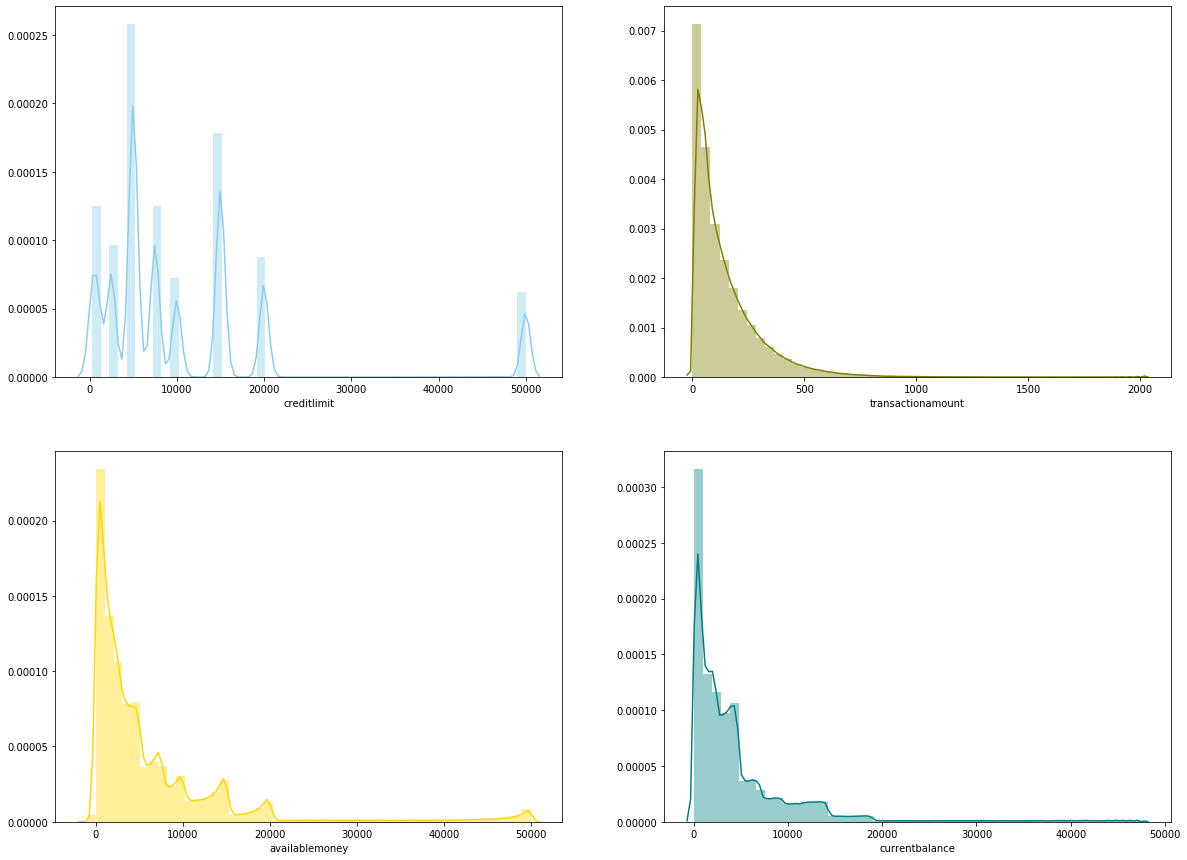

In [49]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

sns.distplot( df1["creditlimit"] , color="skyblue", ax=ax[0, 0])
sns.distplot( df1["transactionamount"] , color="olive", ax=ax[0, 1])
sns.distplot( df1["availablemoney"] , color="gold", ax=ax[1, 0])
sns.distplot( df1["currentbalance"] , color="teal", ax=ax[1, 1])

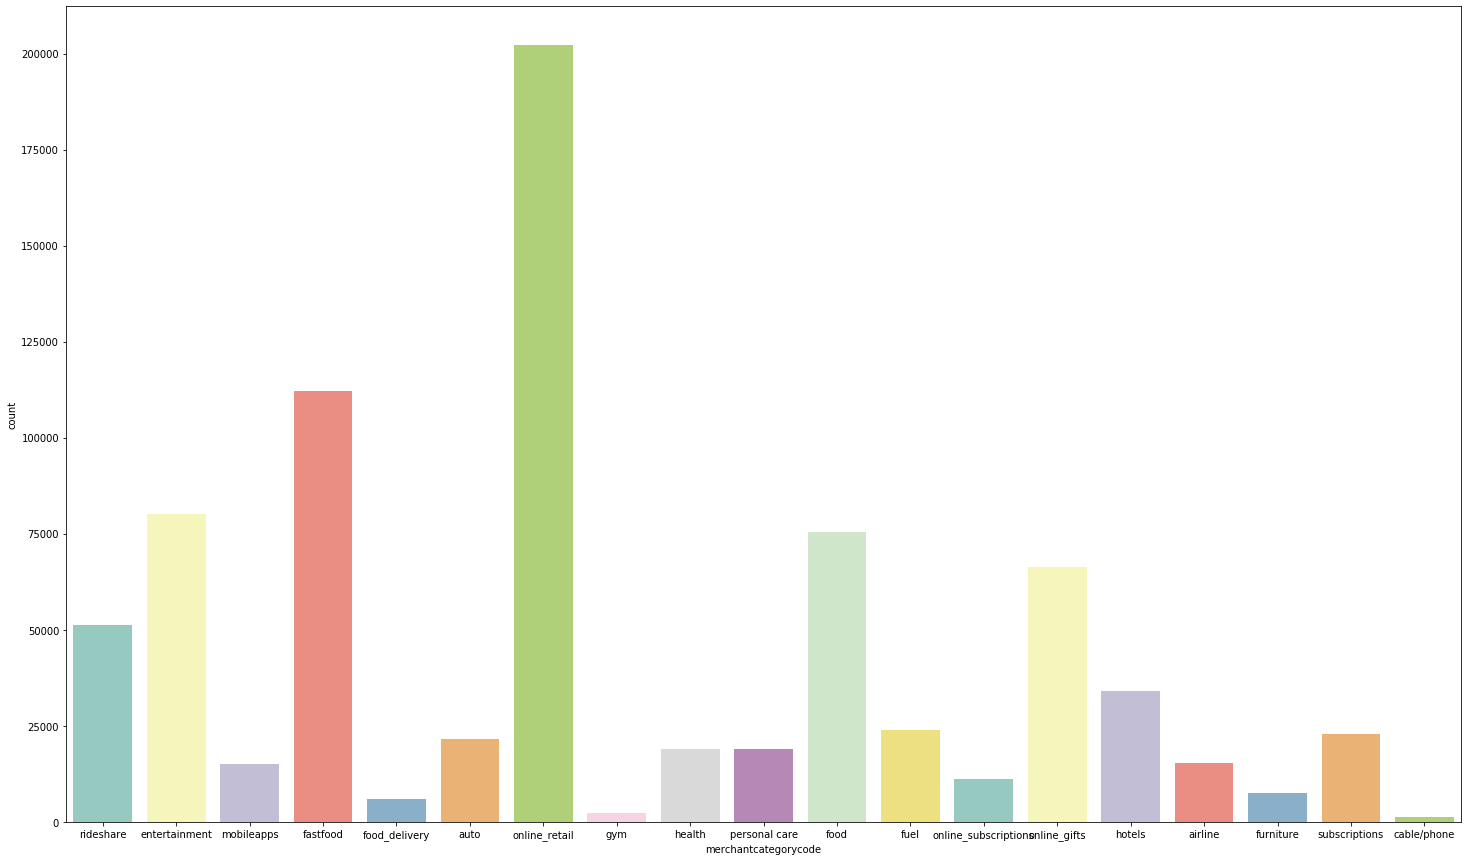

In [50]:
fig = plt.figure(figsize=(25,15)) 
ax = sns.countplot(x="merchantcategorycode", data=df1, palette="Set3")